# MUT Scraper
### A short tutorial for using the MUTScraper module
#### Matt Johnson. (last updated July 5, 2019)

-------------

Scrape and save data from desired positions by inputing one of the following position options and a minimum overall to filter for.

Scraped data included player ratings and traits and is saved to a csv file.

Available Position Options:
- WR
- RB
- QB
- FB
- TE
- OL (LT, LG, C, RG, RT)
- DB (SS, FS, CB)
- LB (ROLB, MLB, LOLB)
- DL (RE, DT, LE)
- ST (K, P)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from MUTScraper import Player, PlayerHandler
%load_ext autoreload
%autoreload 2
import plotly as py
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from ipywidgets import interactive, HBox, VBox, widgets, interact
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Input position, minimum overall, and date:

- Here we have chosen to look at Offensive Line (OL) players.
- Calling handle_players() starts the scraping process.

In [19]:
start = time.time()

ph = PlayerHandler(position='OL', min_ovr=93, date='july5')
ph.handle_players()

finish = time.time()

print(f'Time elapsed: {finish-start:.2f} sec')

Number of pages: 6
https://www.muthead.com/19/players?filter-market=3&filter-ovr-min=93&filter-position=992&page=1
 129 player links gathered.
Time elapsed: 357.39 sec


### Data
We now have the ratings, attributes, and traits for the players.<br>
Here is the DataFrame holding the player data:

In [21]:
pdf = ph.player_df
pdf.head()

,ACC,AGI,AWR,IBL,LBK,PBF,PBK,PBP,RBF,RBK,...,SPD,STR,High Motor,Penalty,HtWt,OVR,Position,Team,Ht,Wt
Willie Anderson,69,57,99,99,90,97,98,99,97,98,...,59,99,Yes,Norma,"Ht: 6' 5"" Wt: 340",99,RT,Cincinnati Bengals,77,340
David Andrews,89,63,99,96,98,99,98,97,99,99,...,73,91,Yes,Norma,"Ht: 6' 3"" Wt: 295",99,C,New England Patriots,75,295
Steve Hutchinson,80,65,99,99,98,95,97,98,96,99,...,67,97,Yes,Disciplined,"Ht: 6' 5"" Wt: 313",99,LG,Seattle Seahawks,77,313
Chris Lindstrom,89,74,99,99,99,97,96,96,99,99,...,81,93,Yes,Norma,"Ht: 6' 4"" Wt: 308",99,RG,Atlanta Falcons,76,308
Kevin Mawae,82,68,98,94,97,99,99,98,98,96,...,69,97,Yes,Norma,"Ht: 6' 4"" Wt: 289",99,C,New York Jets,76,289


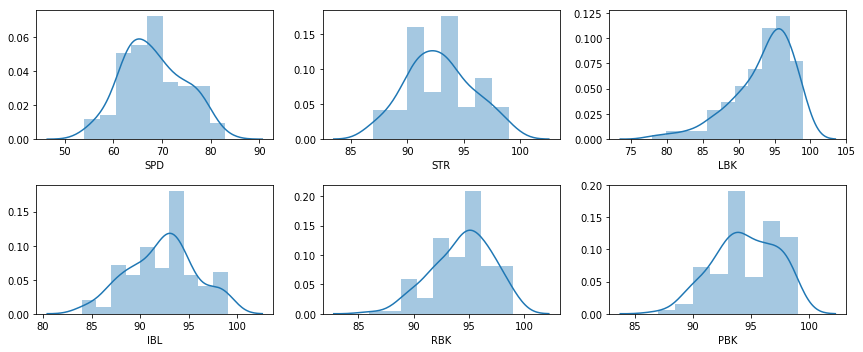

In [28]:
import seaborn as sns

plt.figure(figsize=(12,5))

attribs = ['SPD', 'STR', 'LBK', 'IBL', 'RBK', 'PBK']

for i in range(len(attribs)):
    plt.subplot(2, 3, i+1)
    sns.distplot(pdf[attribs[i]]);
plt.tight_layout();

#### Filtering data to fit our needs
- Lead the Way requires 90 LBK and is a must we filter for 89 as to keep players with Power-Ups in play (which would give them a +1). 
- Speed is important for pulling and getting blocks so we remove the slower players to clean up our visualization

In [22]:
def attribute_restriction(dat, attrib, rating):
    df = dat.copy()
    df = df[ df[attrib] >= rating]
    return df

In [23]:
pdf2 = attribute_restriction(pdf, 'LBK', 89)
pdf2 = attribute_restriction(pdf2, 'SPD', 70)

#### Grouping players by position:
- This is just for coloring in Plotly

In [24]:
ol_groups = pdf2.groupby('Position')

df_dict = {}

for name, group in ol_groups:
    df_dict.update({name: group})

### Visualization with Plotly 

In [33]:
positions = ['LT', 'LG', 'C', 'RG', 'RT']
attribs = ['RBK', 'Wt', 'PBK', 'LBK', 'SPD', 'IBL', 'STR', 'AGI']
color_map = {'LT': 'rgb(230,0,230)', 'LG': 'rgb(230,230,230)', 'C': 'rgb(20,230,100)', 
             'RG': 'rgb(240,5,30)', 'RT': 'rgb(0,50,240)'}

def get_trace(df, pos):
    trace = go.Splom(dimensions = [dict(label=attrib, values=df[attrib]) for attrib in attribs],
                text=df.index.values,
                name=pos,
                marker=dict(size=6,
                            showscale=False,
                            line=dict(width=0.5,
                                      color=color_map[pos])))
    trace['diagonal'].update(visible=False)
    trace['showupperhalf']=False
    return trace

    
traces = [get_trace(df_dict.get(pos), pos) for pos in positions]

axis = dict(showline=True,
          zeroline=False,
          gridcolor='#fff',
          ticklen=4)


layout = go.Layout(
    title='MUT19 Offensive Lineman (93+ OVR)',
    dragmode='select',
    width=1000,
    height=800,
    autosize=False,
    hovermode='closest',
    plot_bgcolor='rgba(240,240,240, 0.95)',
    xaxis1=dict(axis), xaxis2=dict(axis), xaxis3=dict(axis), xaxis4=dict(axis),
    xaxis5=dict(axis), xaxis6=dict(axis), xaxis7=dict(axis), xaxis8=dict(axis),
    yaxis1=dict(axis), yaxis2=dict(axis), yaxis3=dict(axis), yaxis4=dict(axis),
    yaxis5=dict(axis), yaxis6=dict(axis), yaxis7=dict(axis), yaxis8=dict(axis)
)

fig = dict(data=traces, layout=layout)

py.iplot(fig)

In [34]:

'''
f = go.FigureWidget(data=fig['data'], layout=fig['layout'])

slider = widgets.IntSlider(
    value=88,
    min=86,
    max=99,
    step=1,
    description='OVR',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)


slider.layout.width = '600px'

def update_range():
    f.data[0].z = np.cos(x * yt * frequency / 10.0) + np.sin(x * yt * frequency / 10.0) * 2


# display the FigureWidget and slider with center justification
vb = VBox((f, interactive(update_range, y=slider)))
vb.layout.align_items = 'center'
vb
'''


"\nf = go.FigureWidget(data=fig['data'], layout=fig['layout'])\n\nslider = widgets.IntSlider(\n    value=88,\n    min=86,\n    max=99,\n    step=1,\n    description='OVR',\n    disabled=False,\n    continuous_update=False,\n    orientation='horizontal',\n    readout=True,\n    readout_format='d'\n)\n\n\nslider.layout.width = '600px'\n\ndef update_range():\n    f.data[0].z = np.cos(x * yt * frequency / 10.0) + np.sin(x * yt * frequency / 10.0) * 2\n\n\n# display the FigureWidget and slider with center justification\nvb = VBox((f, interactive(update_range, y=slider)))\nvb.layout.align_items = 'center'\nvb\n"